/home/manisha/.local/lib/python3.5/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [16] are constant.
  UserWarning)
/home/manisha/.local/lib/python3.5/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


X train shape: (125973, 122)
x train selected shape (125973, 61)
[ True False False False  True False  True  True  True False  True False
 False False  True False False False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False False  True False False  True  True
  True  True False False False  True False  True  True False False False
  True  True False False False  True False  True False  True False False
 False False False False False False False False False  True False False
  True False False False False  True  True False False False False  True
 False False False  True False  True False False False False False  True
  True  True  True False  True  True  True  True  True False False False
  True  True]
(122,)
{0: True, 'icmp': True, 'systat': False, 4: False, 5: False, 6: False, 7: True, 8: False, 9: True, 10: True, 11: True, 12: False, 13: True, 14: False, 15: False, 16: False, 17: True, 1

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:61: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead


'select = SelectFromModel(DecisionTreeClassifier(),threshold="median")\nselect.fit(x_train,y_train)\nselect_m=select.transform(x_train)\nprint(\'Selected from model\',select_m.shape)\n\nmask2 = select.get_support()\nprint(mask2)\nplt.matshow(mask2.reshape(1,-1),cmap="gray_r")'

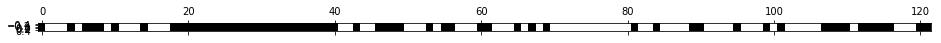

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
train = pd.read_csv('KDDTrain2.csv',header=None)
train = train.iloc[:,:-1]
#print(train)
x_train = train.iloc[:,:-1]
#print(x_train)
y_train = train.iloc[:,-1]
#print(y_train)

#one hot encoding of categorical variables:
x_train=pd.concat([x_train,pd.get_dummies(x_train[1])],axis=1)
x_train.drop([1],axis=1,inplace=True)
#print(x_train)

x_train = pd.concat([x_train,pd.get_dummies(x_train[2])],axis=1)
x_train.drop([2],axis=1,inplace=True)
#print(x_train)

x_train = pd.concat([x_train,pd.get_dummies(x_train[3])],axis=1)
x_train.drop([3],axis=1,inplace=True)
#print(x_train)

selected = SelectPercentile(percentile=50)
selected.fit(x_train,y_train)

header=x_train.columns.values.tolist()

x_train_selected=selected.transform(x_train)
print('X train shape:',x_train.shape)
print('x train selected shape',x_train_selected.shape)

mask = selected.get_support()
print(mask)
print(mask.shape)
plt.matshow(mask.reshape(1,-1),cmap="gray_r")


dictionary = dict(zip(header,mask))
print(dictionary)

for cat in dictionary:
    if dictionary[cat]==False:
        x_train=x_train.drop([cat],axis=1)
print("shape",x_train.shape)

test = pd.read_csv('KDDTest2.csv',header=None)
#print(test)

t1 = pd.get_dummies(test.iloc[:,1])
#print(t1)

cat=['IRC', 'X11', 'Z39_50', 'aol', 'auth', 'bgp', 'courier', 'csnet_ns', 'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i', 'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher', 'harvest', 'hostnames', 'http', 'http_2784', 'http_443', 'http_8001', 'imap4', 'iso_tsap', 'klogin', 'kshell', 'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm', 'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u', 'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private', 'red_i', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh', 'sunrpc', 'supdup', 'systat', 'telnet', 'tftp_u', 'tim_i', 'time', 'urh_i', 'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois']
xt2 = list(test.iloc[:,2])
t2 = pd.Series(xt2)
#print(t2)
t2 = t2.astype('category',categories=cat)
dt2 = pd.get_dummies(t2)
print(dt2)
#t2 = t2.T.reindex(cat).T.fillna(int(0))
#print(t2.http)

t3= pd.get_dummies(test.iloc[:,3])
print(t3)
"""for val in :
    if val==True:"""
        

"""select = SelectFromModel(DecisionTreeClassifier(),threshold="median")
select.fit(x_train,y_train)
select_m=select.transform(x_train)
print('Selected from model',select_m.shape)

mask2 = select.get_support()
print(mask2)
plt.matshow(mask2.reshape(1,-1),cmap="gray_r")"""


In [14]:
from sklearn import tree
print(x_train)
model = tree.DecisionTreeClassifier()
model = model.fit(x_train,y_train)


           0  7  9  10  11  13  17  21   22  23 ...  uucp_path  vmnet  whois  \
0          0  0  0   0   0   0   0   0    2   2 ...          0      0      0   
1          0  0  0   0   0   0   0   0   13   1 ...          0      0      0   
2          0  0  0   0   0   0   0   0  123   6 ...          0      0      0   
3          0  0  0   0   1   0   0   0    5   5 ...          0      0      0   
4          0  0  0   0   1   0   0   0   30  32 ...          0      0      0   
5          0  0  0   0   0   0   0   0  121  19 ...          0      0      0   
6          0  0  0   0   0   0   0   0  166   9 ...          0      0      0   
7          0  0  0   0   0   0   0   0  117  16 ...          0      0      0   
8          0  0  0   0   0   0   0   0  270  23 ...          0      0      0   
9          0  0  0   0   0   0   0   0  133   8 ...          0      0      0   
10         0  0  0   0   0   0   0   0  205  12 ...          0      0      0   
11         0  0  0   0   0   0   0   0  